In [75]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [2]:
path = r"C:\Users\sonia\Documents\Document\2022-2023\Projet 3I - Deep Learning\dataset_clean.csv"
TARGET = 'Label'

In [3]:
df = pd.read_csv(path)

In [4]:
df = df[['Init_Win_bytes_forward',
'Total Length of Fwd Packets',
'Bwd Header Length',
'Destination Port',
'Subflow Fwd Bytes',
'Packet Length Std',
'Packet Length Variance',
'Bwd Packets/s',
'Average Packet Size',
'Bwd Packet Length Std',
         "Label"]]

In [5]:
df_b = df[df['Label']==1]
df_a = df[df['Label']==0]

In [6]:
df_b= df_b[0:2241]

In [7]:
df = pd.concat([df_a, df_b], axis=0)

In [8]:
df = df.sample(frac=1)

In [9]:
y = df[TARGET]
X = df.drop([TARGET],axis=1)

In [10]:
y = y.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [73]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))

## Model

In [148]:
model = Sequential()

#0.9342
model.add(Dense(32, input_shape=(1, 10,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y.shape[1], activation='sigmoid'))
model.add(Flatten())

#model.add(Dense(64, input_shape=(1, 10,), activation="relu"))
#model.add(Dense(y.shape[1], activation='relu'))

#0.9309
#model.add(Dense(32, input_shape=(1, 10,), activation="relu"))
#model.add(Dense(64, activation="tanh"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())


model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 1, 32)             352       
                                                                 
 dense_117 (Dense)           (None, 1, 64)             2112      
                                                                 
 dense_118 (Dense)           (None, 1, 128)            8320      
                                                                 
 dense_119 (Dense)           (None, 1, 2)              258       
                                                                 
 flatten_15 (Flatten)        (None, 2)                 0         
                                                                 
Total params: 11,042
Trainable params: 11,042
Non-trainable params: 0
_________________________________________________________________


In [149]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 3, 
                                        restore_best_weights = True)

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs = 25, 
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/25
113/113 [==============================] - 18s 72ms/step - loss: 0.4688 - accuracy: 0.7969 - val_loss: 0.3137 - val_accuracy: 0.8818
Epoch 2/25
113/113 [==============================] - 6s 56ms/step - loss: 0.3156 - accuracy: 0.8502 - val_loss: 0.2552 - val_accuracy: 0.9142
Epoch 3/25
113/113 [==============================] - 3s 23ms/step - loss: 0.2611 - accuracy: 0.8817 - val_loss: 0.2152 - val_accuracy: 0.9186
Epoch 4/25
113/113 [==============================] - 3s 25ms/step - loss: 0.2347 - accuracy: 0.8934 - val_loss: 0.2252 - val_accuracy: 0.9119
Epoch 5/25
113/113 [==============================] - 3s 24ms/step - loss: 0.2156 - accuracy: 0.9035 - val_loss: 0.2007 - val_accuracy: 0.9175
Epoch 6/25
113/113 [==============================] - 3s 24ms/step - loss: 0.2019 - accuracy: 0.9146 - val_loss: 0.1908 - val_accuracy: 0.9231
Epoch 7/25
113/113 [==============================] - 3s 25ms/step - loss: 0.2026 - accuracy: 0.9183 - val_loss: 0.1924 - val_accuracy: 0.923

In [ ]:
accuracy = model.evaluate(X_test, y_test)
accuracy # 0.9119


In [ ]:
model.predict(X_train)

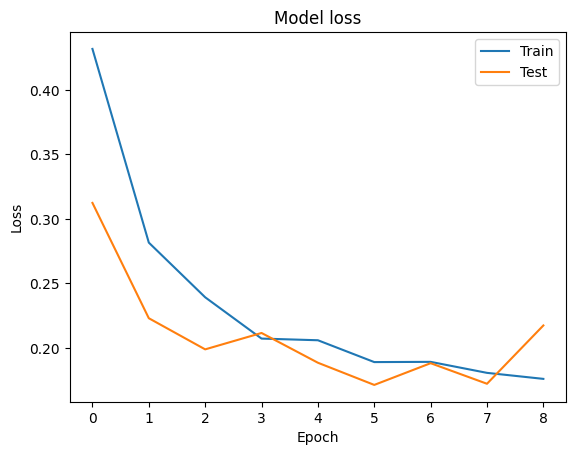

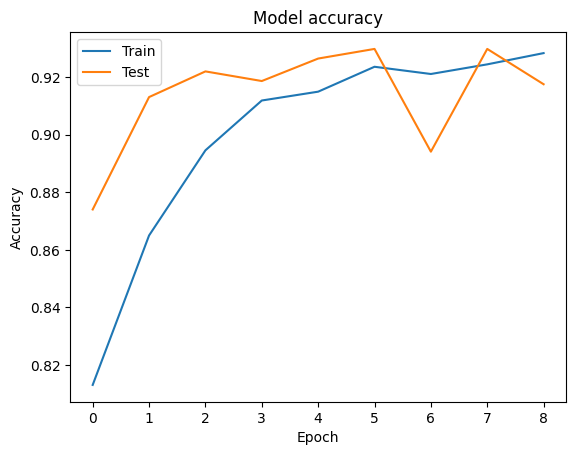

In [137]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])